# Logistic Regression --> SVC --> KNN – K-nearest neighbors

I used this dataset for logistic regression. After that, I decided to try SVC as well to see if I could achieve better metrics. The final stage is to try KNN on this dataset to see whether I can get better results.

The data is processed before, which is why in this notebook, I just upload the data and experiment with KNN.

The dataset is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to determine if the product (bank term deposit) would be subscribed ('yes') or not ('no').

Link to the dataset: https://www.kaggle.com/datasets/rouseguy/bankbalanced

# Load data

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [171]:
# uploading dataset to juputer notebook
df = pd.read_csv("bank_newdata.csv")

In [172]:
df.describe()

,age,job,marital,education,failed_previous_credit,balance,housing_loan,loan,contact_type,day_of_week,month,contact_duration_sec,number_of_contacts,days_since_last_contact,previous_number_of_contacts,poutcome,subscribed_deposit
count,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000
mean,36.413924,4.396994,1.245387,1.295796,0.021305,549.281149,0.537189,0.149515,0.602435,15.940460,6.103862,373.704584,2.705916,12.243485,0.162070,2.922389,0.401940
std,5.869317,3.361878,0.627783,0.696676,0.144413,676.417829,0.498663,0.356629,0.894245,8.463755,2.336564,362.562261,3.013079,54.891297,0.631178,0.267584,0.490337
min,27.000000,0.000000,0.000000,0.000000,0.000000,-1129.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,51.000000,0.000000,0.000000,0.000000,8.000000,5.000000,133.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,36.000000,4.000000,1.000000,1.000000,0.000000,322.000000,1.000000,0.000000,0.000000,16.000000,6.000000,248.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,41.000000,7.000000,2.000000,2.000000,0.000000,882.000000,1.000000,0.000000,2.000000,22.000000,8.000000,508.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,48.000000,11.000000,2.000000,3.000000,1.000000,2655.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3284.000000,43.000000,771.000000,4.000000,3.000000,1.000000


In [173]:
df.head()

,age,job,marital,education,failed_previous_credit,balance,housing_loan,loan,contact_type,day_of_week,month,contact_duration_sec,number_of_contacts,days_since_last_contact,previous_number_of_contacts,poutcome,subscribed_deposit
0,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
1,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
2,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
3,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
4,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


# Converting data to X/y

In [174]:
# converting data to X/y
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('subscribed_deposit', axis=1)
y = df['subscribed_deposit']

In [175]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

#   Create the KNN classifier and fit the data

Based on iterations, best k-value is this:
9


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=9))])

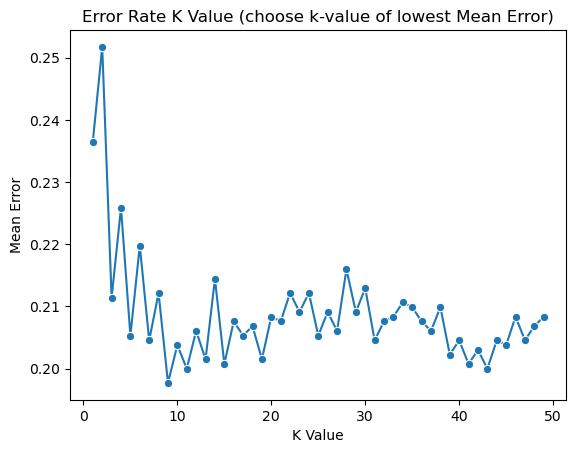

In [176]:
# determine the optimal k-value for this algorithm

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
# this has to always be less than the amount of rows
# in the training data
max_iterations = 50

# list to save the error values in the loop
error = []

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

# build the model with the optimal values
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric="minkowski", algorithm="brute"))
model.fit(X_train, y_train)

# I played with different random state
# and I was able to get the best result with 50 --> 80.23%

# I tried different algorithms such as
# "auto", "ball_tree", "kd_tree" 
# result is the same --> 80.23%

# Some metric values such as "chebyshev" and "manhattan" 
# even decreased the overall accuracy

#  Classification error metrics

In [177]:
predictions = model.predict(X_test)

In [178]:
# print the classification report based on true values and predictions
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       813
           1       0.79      0.65      0.72       502

    accuracy                           0.80      1315
   macro avg       0.80      0.77      0.78      1315
weighted avg       0.80      0.80      0.80      1315


Model overall accuracy: 80.23%


<Axes: >

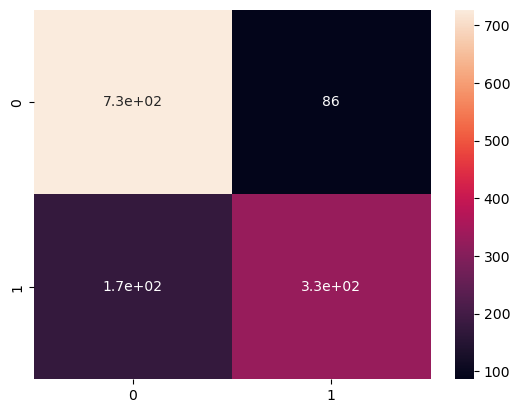

In [179]:
#print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [180]:
# The AUC score
roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])

0.8689387591087065

# Analysis

**Comparison of Logistics regression, SVC and KNN results**  

Precision for class 0:  
Logistic Regression: 83%  
SVC: 86%  
KNN: 81%  

Precision for class 1:  
Logistic Regression: 79%  
SVC: 83%  
KNN: 79%  

SVC achieves slightly higher precision for both classes compared to Logistic Regression, indicating that SVC produces fewer false positives. KNN shows slightly lower precision compared to both Logistic Regression and SVC.

Recall for class 0:  
Logistic Regression: 86%  
SVC: 89%  
KNN: 81%  

Recall for class 1:  
Logistic Regression: 75%  
SVC: 80%  
KNN: 65%  

Logistic Regression has higher recall for class 0, while SVC has higher recall for class 1. KNN demonstrates the lowest recall for both classes, indicating that it is less effective at identifying true positives and true negatives compared to Logistic Regression and SVC.

F1-score for class 0:  
Logistic Regression: 84%   
SVC: 88%  
KNN: 81%  

F1-score for class 1:  
Logistic Regression: 77%  
SVC: 81%  
KNN: 72%  

SVC outperforms Logistic Regression in terms of F1-score for both classes, indicating better overall performance in terms of balancing precision and recall. KNN demonstrates slightly lower F1-scores compared to both Logistic Regression and SVC.

Accuracy: 
Logistic Regression: 81.44%  
SVC: 84.94%  
KNN: 80.23%  

SVC achieves higher accuracy (84.94%) compared to Logistic Regression (81.44%), indicating that it makes fewer overall mistakes in classification. KNN demonstrates slightly lower accuracy compared to both Logistic Regression and SVC.

**In summary, based on the provided results, Support Vector Classifier (SVC) demonstrates superior performance compared to Logistic Regression and KNN across various evaluation metrics, including precision, recall, F1-score, and overall accuracy.**